# HW8 total 8 points
# Feature engineering and NA handling

Before we build any classification model, we need to understand the dataset, It'll help in relevant features creation and proper handling of missing values.

In this homework we will see how to create new features and measure association (such as correlation between numerical variables) between two categorical variables. There are more columns for feature engineering, but we will focus on the name column and filling missing values in other columns.

To illustrate the concept, we will use the "titanic" dataset. This is a well explored dataset but provides a lot of opportunities for feature engineering. Our task is predicting the survival of a passenger, but we will not build a model in this homework.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
sns.set(style="darkgrid")

In [2]:

titanic_df = pd.read_csv('https://raw.githubusercontent.com/utsav507/titanic-data-analysis/master/titanic_train.csv')

In [3]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- As you can see a lot of people don't have a cabin (687/891). We can't drop records based on cabin. We will encode not having a cabin as character **O**

# Q1 (.5 points) Fill NAN in cabin with Character 'O'

In [6]:
#Write code here
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('O')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,O,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,O,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,O,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,O,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,O,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,O,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,O,C


In [7]:
titanic_df.Cabin.head(15)

0        O
1      C85
2        O
3     C123
4        O
5        O
6      E46
7        O
8        O
9        O
10      G6
11    C103
12       O
13       O
14       O
Name: Cabin, dtype: object

If we one hot encode above cabin values and view correlation heatmap, there will be a lot of categories. Let create a new column based on cabin class first letter (C, D ,E, O etc.) .

# Q2 (.5 points) Create a new column named Cabin_type.  Use first character from Cabin field to fill value in  Cabin_type.

In [8]:
#Write code here
titanic_df['Cabin_type']=titanic_df['Cabin'].str[0]

In [9]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,O,S,O
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,O,S,O


Let's explore survival based on sex.

# Q3(.5 point) Using seaborn plot a countplot   of Sex. Use proper hue so that it highlights Survived or not.

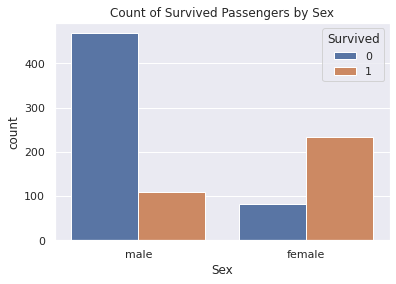

In [10]:
#Write code here
sex_survive = sns.countplot(data=titanic_df, x='Sex', hue='Survived').set(title='Count of Survived Passengers by Sex')

# Q4(.5) What is your observation from this plot.

It is shown by the count plot that females survived the titantic incident more then males.



We can't use name as a feature for building any machine learning classifier (logistic regression). Let's look at Name column and see if we can think of a better feature for name.

In [11]:
titanic_df['Name'].sample(30)

857                               Daly, Mr. Peter Denis 
242                      Coleridge, Mr. Reginald Charles
610    Andersson, Mrs. Anders Johan (Alfrida Konstant...
569                                    Jonsson, Mr. Carl
141                             Nysten, Miss. Anna Sofia
402                             Jussila, Miss. Mari Aina
693                                     Saad, Mr. Khalil
30                              Uruchurtu, Don. Manuel E
481                     Frost, Mr. Anthony Wood "Archie"
87                         Slocovski, Mr. Selman Francis
107                               Moss, Mr. Albert Johan
2                                 Heikkinen, Miss. Laina
125                         Nicola-Yarred, Master. Elias
724                        Chambers, Mr. Norman Campbell
492                           Molson, Mr. Harry Markland
319    Spedden, Mrs. Frederic Oakley (Margaretta Corn...
57                                   Novel, Mr. Mansouer
165      Goldsmith, Master. Fra

# Q5.(.5 points) Can you suggest a feature based on *Name* column. 

Features that can be included from the Name column include:
- Breaking it into first and last name columns
- Breaking the titles into another columns (Mr / Ms)
- Add an alias / maiden name column

# Q6(.5 points) Create a new feature named *Title* from the *Name* column.

Hint: Here are different titles

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess',
       'Jonkheer.'], dtype=object)
       
       
You can look in wikipedia see what different titles meant that time.

In [12]:
# Write code here
titanic_df['Title'] = titanic_df['Name'].str.extract(r', (\w+\.)')

In [13]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,O,S,O,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,O,S,O,Mr.
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,O,Q,O,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,O,S,O,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,O,S,O,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,O,C,O,Mrs.


# Q 7 (. 5 points) Using seaborn, plot survival based on Title. Display separate plots for males and for females.

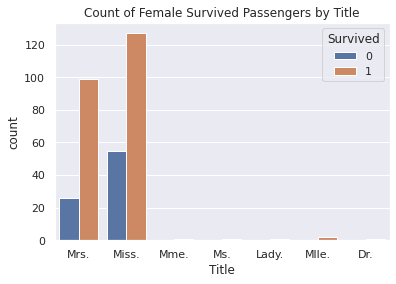

In [14]:
# Write code here
femaleDF = titanic_df[titanic_df['Sex'] == 'female']
title_survived = sns.countplot(data=femaleDF, x='Title', hue='Survived').set(title="Count of Female Survived Passengers by Title")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Mr.'),
  Text(1, 0, 'Master.'),
  Text(2, 0, 'Don.'),
  Text(3, 0, 'Rev.'),
  Text(4, 0, 'Dr.'),
  Text(5, 0, 'Major.'),
  Text(6, 0, 'Sir.'),
  Text(7, 0, 'Col.'),
  Text(8, 0, 'Capt.'),
  Text(9, 0, 'Jonkheer.')])

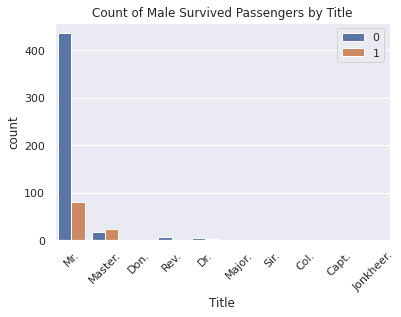

In [15]:
maleDF = titanic_df[titanic_df['Sex'] == 'male']
title_survived = sns.countplot(data=maleDF, x='Title', hue='Survived').set(title="Count of Male Survived Passengers by Title")
plt.legend(loc='upper right')
plt.xticks(rotation=45)

# Q 8(.5 points) What is your observation from these plots?

There were fewer of those with prestigous titles like Lady, Dr, Major, Capt.
A majority of people had standard titles. Women with the title Miss (unmarried women, probably also children) were the most likely to surivive. 

Let's fix Age nan issue. It has 167 nan values.

# Q9 (.5 points) Fill the Age NaN value by the mean for each **Title** group.

In [16]:
# Write code here
empty_Age = titanic_df['Age']=='O'
titanic_df.loc[empty_Age]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title


In [17]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df.groupby('Title')['Age'].transform('mean'))
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,O,S,O,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,O,S,O,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,O,S,O,Mr.
5,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,O,Q,O,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,E,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,O,S,O,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,O,S,O,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,O,C,O,Mrs.


In [18]:
# Let's see if there are still some NAN 
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Cabin_type     0
Title          1
dtype: int64

There are two records with a missing Embarked value.

In [19]:
# Let's drop these two records
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [20]:
titanic_df.Sex = np.where(titanic_df['Sex'] =='male', 1, 0)

In [21]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Cabin_type      object
Title           object
dtype: object

In [22]:
titanic_clean_df= titanic_df[[
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_type',
 'Title']]

# Q10.(.5 points) Using titanic_clean_df  convert  *Title* and *Cabin_type* into dummy columns.

In [23]:
# Write code here
titanic_clean_df = pd.get_dummies(titanic_clean_df, columns=['Title', 'Cabin_type'])

In [24]:
titanic_clean_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Capt.,Title_Col.,...,Title_Sir.,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_O,Cabin_type_T
0,0,3,1,22.0,1,0,7.2500,S,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,C,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,35.0,1,0,53.1000,S,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,S,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
titanic_clean_df.dtypes

Survived             int64
Pclass               int64
Sex                  int64
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Embarked            object
Title_Capt.          uint8
Title_Col.           uint8
Title_Don.           uint8
Title_Dr.            uint8
Title_Jonkheer.      uint8
Title_Lady.          uint8
Title_Major.         uint8
Title_Master.        uint8
Title_Miss.          uint8
Title_Mlle.          uint8
Title_Mme.           uint8
Title_Mr.            uint8
Title_Mrs.           uint8
Title_Ms.            uint8
Title_Rev.           uint8
Title_Sir.           uint8
Cabin_type_A         uint8
Cabin_type_B         uint8
Cabin_type_C         uint8
Cabin_type_D         uint8
Cabin_type_E         uint8
Cabin_type_F         uint8
Cabin_type_G         uint8
Cabin_type_O         uint8
Cabin_type_T         uint8
dtype: object

# Q11.(.5) Plot a heatmap of correlation using titanic_df.

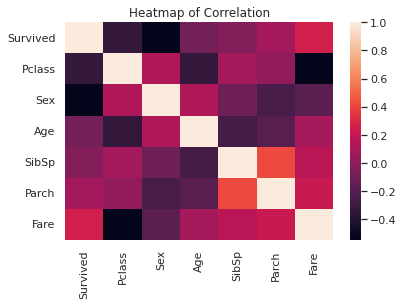

In [26]:
# Write code here
cols = ["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
heat_df = titanic_df[cols].corr()
heatmap = sns.heatmap(data=heat_df).set(title='Heatmap of Correlation')

# Q 12.(.5) What are your observations from this heatmap.

This heatmap shows the following:
- Sex has a strong correlation on whether someone survived
- A person's class has a strong correlation on the amount of fare
- A person's age has a strong correlation to their class
- The amount a person paid in fare isn't strongly correlated to whether they survived

 

Note that correlation  measures **linear relationships** and is defined for numeric attributes. Also, be careful that
there need not be a linear relationship between variables (Survived vs any other attributes).

For categorical variables, we need to use a different measure of association.

- [Cramér's V, measure of association between two nominal variables](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

It is based on a nominal variation of the Pearson’s Chi-Square Test.

Let us use this implementation from stack overflow
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792. It shows usage for **tips** dataset from seaborn.

Let us copy and paste this here:

In [27]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

Let us work with  titanic dataset again.


# Q 13(.5 points) Copy titanic_df into titanic_df_small  Dataframe.  Only select records with Title value = *Master., Miss., Mr. or Mrs.*  into titanic_df_small.

You can check that other titles do not have enough records, hence we will ignore them in our analysis.

In [28]:
# Write code here
titanic_df_small = titanic_df.copy()
titanic_df_small = titanic_df_small[titanic_df_small['Title'].isin(['Master.', 'Miss.', 'Mr.', 'Mrs.'])]
titanic_df_small.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,O,S,O,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,O,S,O,Mr.


In [31]:
titanic_df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  862 non-null    int64  
 1   Survived     862 non-null    int64  
 2   Pclass       862 non-null    int64  
 3   Name         862 non-null    object 
 4   Sex          862 non-null    int64  
 5   Age          862 non-null    float64
 6   SibSp        862 non-null    int64  
 7   Parch        862 non-null    int64  
 8   Ticket       862 non-null    object 
 9   Fare         862 non-null    float64
 10  Cabin        862 non-null    object 
 11  Embarked     862 non-null    object 
 12  Cabin_type   862 non-null    object 
 13  Title        862 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 101.0+ KB


# Q 14 (.5 points) Using pandas cross tabulate *Survived* and *Title* in titanic_df_small. Also compute cramers_v for association between *Survived* and *Title*.

In [29]:
# Write code here
cross_tab = pd.crosstab(titanic_df_small['Survived'], titanic_df_small['Title'])
cross_tab

Title,Master.,Miss.,Mr.,Mrs.
Survived,,,,
0,17,55,436,26
1,23,126,81,98


In [34]:
cramers_v(cross_tab.values)

0.56837187121439

# Q 15 (.5 points) Using sklearn library, Label encode *Title* in titanic_df_small into a new column called *Encoded_title*

In [36]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
titanic_df_small['Encoded_title'] = le.fit_transform(titanic_df_small['Title'])
titanic_df_small.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title,Encoded_title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,O,S,O,Mr.,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O,Miss.,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,Mrs.,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,O,S,O,Mr.,2


# Q 16 (.5 points) Calculate correlation coefficients between *Survived* and *Encoded_title*.

In [37]:
import scipy.stats as stats
x = titanic_df_small['Survived']
y = titanic_df_small['Encoded_title']

In [38]:
stats.pearsonr(x, y)

(-0.07287583211561174, 0.03240628831644028)

In [39]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.07896937956228434, pvalue=0.020406657693689784)

In [40]:
stats.kendalltau(x, y)

KendalltauResult(correlation=-0.07481546402747852, pvalue=0.02049377447627227)

# Q 17. (.5 points) What is your observation comparing the use of cramer_v and correlation coefficients for  *Survived* and *Encoded_title/Title*.

According to the correlation coefficents, there is not a strong correlation between Survived and Encoder_title / Title-- more of a medium correlation.  This makes sense as we saw that correlation was not strong in our bar chart plotted earlier on. Many people had standard titles, which doesn't mean much when there's so few of the more prestigious titles. 